Começamos importando algumas bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

Importamos nosso dataset

In [0]:
sheets_url = 'https://raw.githubusercontent.com/paulokiim/Analise-de-Dados/master/RandomForest/heart.csv'
df = pd.read_csv(sheets_url)

Imprimimos as 10 primeiras linhas

In [13]:
print(df.head(10))

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5   57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6   56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7   44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8   52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9   57    1   2       150   168    0  ...      0      1.6      2   0     2       1

[10 rows x 14 columns]


Calculamos e imprimos quantas pessoas estao saudaveis e quantas estao com doenca de coracao:

In [14]:
healthy = df[(df['target'] ==0) ].count()[1]
sick = df[(df['target'] ==1) ].count()[1]

print ("Ha " + str(healthy) + " pessoas saudaveis")
print ("Ha " + str(sick) + " pessoas com problema de coracao")

Ha 138 pessoas saudaveis
Ha 165 pessoas com problema de coracao



Agora vamos normalizar os dados e separar entre treinamento e testes

O treinamento contemplará 70% do dataset e os testes 30%

Os valores do nosso dataframe eh todo copiado para X. Sao copiados apenas os valores, nao a tabela em si

y contem os valores dos targets: copiados apenas os valores, nao a coluna em si 

iloc seleciona linhas e colunas por números

In [0]:
X = df.iloc[:,0:13].values
y = df.iloc[:,13].values

Vamos normalizar o nosso dataset

Criaremos um novo DataFrame, todo normaalizado

Por equanto esse novo data frame nao tem a coluna target

In [0]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index = df.index, columns = df.columns[0:13])

Imprimiremos as 10 primeiras linhas do nosso dataset normalizado, para poder vizualizar

In [17]:
print(dfNorm.head(10))

        age       sex        cp  ...     slope        ca      thal
0  0.952197  0.681005  1.973123  ... -2.274579 -0.714429 -2.148873
1 -1.915313  0.681005  1.002577  ... -2.274579 -0.714429 -0.512922
2 -1.474158 -1.468418  0.032031  ...  0.976352 -0.714429 -0.512922
3  0.180175  0.681005  0.032031  ...  0.976352 -0.714429 -0.512922
4  0.290464 -1.468418 -0.938515  ...  0.976352 -0.714429 -0.512922
5  0.290464  0.681005 -0.938515  ... -0.649113 -0.714429 -2.148873
6  0.180175 -1.468418  0.032031  ... -0.649113 -0.714429 -0.512922
7 -1.143291  0.681005  0.032031  ...  0.976352 -0.714429  1.123029
8 -0.260980  0.681005  1.002577  ...  0.976352 -0.714429  1.123029
9  0.290464  0.681005  1.002577  ...  0.976352 -0.714429 -0.512922

[10 rows x 13 columns]


Adicionaremos a coluna target ao novo dataframe, normalizado

Após adicionar target, imprimos as 10 primeiras linhas, para vizualizar nossos dados

In [18]:
dfNorm['target'] = df['target']
dfNorm.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873,1
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922,1
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029,1
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029,1
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922,1


Atribuiremos a X os valores do nosso dataframe normalizado

Atribuimos a y os valores do nosso target do nosso dataframe normalizado

In [0]:
X = dfNorm.iloc[:,0:13].values
y = dfNorm.iloc[:,13].values

Faremos o treinamento do nosso modelo:

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape , y_test.shape)

(212, 13) (212,) (91, 13) (91,)


Calculamos a matriz de correlação

In [0]:
corr = dfNorm.corr()

Plotamos o heatmap, ou mapa de calor

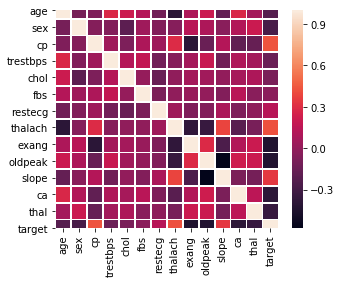

In [22]:
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.75)

Prepara para fazer a função de predição

In [0]:
results_test = {}
results_train = {}
list_algos = []

Função de predição:

In [0]:
def predict_date(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

Iniciamos o Random Forest com n_estimators:

In [25]:
random_forest = RandomForestClassifier(n_estimators=50, random_state = 0)
predict_date(random_forest,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 84.62


Encontramos a importancia de cada feature:

In [0]:
feature_importance = random_forest.feature_importances_
feat_importances = pd.Series(random_forest.feature_importances_, index=df.columns[:-1])
feat_importances = feat_importances.nlargest(13)
feature = df.columns.values.tolist()[0:-1]
importance = sorted(random_forest.feature_importances_.tolist())

Estamos plotando o grafico da importancia das features:

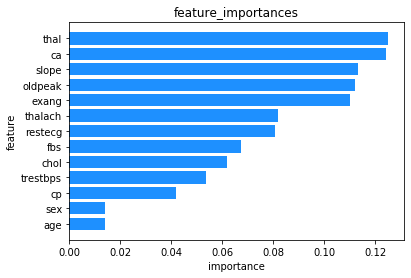

In [27]:
x_pos = [i for i, _ in enumerate(feature)]
plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")
plt.yticks(x_pos, feature)
plt.show()